<a href="https://colab.research.google.com/github/Siva56586/NLP-on-Wines-Reviews/blob/main/Copy_of_Wine_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")

In [ ]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'country', 'designation',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],axis = 1)

In [ ]:
df

,description,points,taster_name,taster_twitter_handle,title
0,"Aromas include tropical fruit, broom, brimston...",87,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,"This is ripe and fruity, a wine that is smooth...",87,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,"Tart and snappy, the flavors of lime flesh and...",87,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,"Pineapple rind, lemon pith and orange blossom ...",87,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,"Much like the regular bottling from 2012, this...",87,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967,Citation is given as much as a decade of bottl...,90,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
129968,Well-drained gravel soil gives this wine its c...,90,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969,"A dry style of Pinot Gris, this is crisp with ...",90,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [ ]:
df.points.value_counts()

,count
points,
88,17207
87,16933
90,15410
86,12600
89,12226
91,11359
92,9613
85,9530
93,6489


In [ ]:
def sentiment_rating(rating):

    if(int(rating) < 90):
        return 0
    else:
        return 1
df.points = df.points.apply(sentiment_rating)

In [ ]:
df

,description,points,taster_name,taster_twitter_handle,title
0,"Aromas include tropical fruit, broom, brimston...",0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,"This is ripe and fruity, a wine that is smooth...",0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,"Tart and snappy, the flavors of lime flesh and...",0,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,"Pineapple rind, lemon pith and orange blossom ...",0,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,"Much like the regular bottling from 2012, this...",0,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,1,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967,Citation is given as much as a decade of bottl...,1,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
129968,Well-drained gravel soil gives this wine its c...,1,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969,"A dry style of Pinot Gris, this is crisp with ...",1,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [ ]:
df.points.value_counts()

,count
points,
0,80926
1,49045


In [ ]:
# Instead of:
# df.columns = ['Review','Liked']

# Use:
df.columns = ['Review','Liked', 'col3', 'col4', 'col5']
# Or drop the extra columns you no longer need and then rename:
# df = df[['description', 'points']] # Keep only the two columns you need
# df.columns = ['Review', 'Liked']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab=1000
tokenizer=Tokenizer(num_words=vocab,oov_token="<oov>") # Use num_words instead of vocab
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

In [ ]:
df.head()

,Review,Liked,col3,col4,col5
0,"Aromas include tropical fruit, broom, brimston...",0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,"This is ripe and fruity, a wine that is smooth...",0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,"Tart and snappy, the flavors of lime flesh and...",0,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,"Pineapple rind, lemon pith and orange blossom ...",0,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,"Much like the regular bottling from 2012, this...",0,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


In [ ]:
X=df.Review.astype('str')
y=df.Liked

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# vocab=1000
# tokenizer=Tokenizer(vocab,oov_token="<oov>")
# tokenizer.fit_on_texts(X_train)
# train_sequence=tokenizer.texts_to_sequences(X_train)
# test_sequence=tokenizer.texts_to_sequences(X_test)
# padded_train=pad_sequences(train_sequence,maxlen=500)
# padded_test=pad_sequences(test_sequence,maxlen=500)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Changed import to tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Changed import to tensorflow.keras
vocab=1000
tokenizer=Tokenizer(num_words=vocab,oov_token="<oov>") # Use num_words instead of vocab
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(Embedding(vocab,1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) # Changed lr to learning_rate

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=10)

Epoch 1/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 555s 170ms/step - accuracy: 0.6684 - loss: 0.6076 - val_accuracy: 0.7908 - val_loss: 0.4866
Epoch 2/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 551s 167ms/step - accuracy: 0.7732 - loss: 0.4732 - val_accuracy: 0.7994 - val_loss: 0.4319
Epoch 3/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 543s 167ms/step - accuracy: 0.7956 - loss: 0.4326 - val_accuracy: 0.8171 - val_loss: 0.3948
Epoch 4/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 606s 181ms/step - accuracy: 0.8009 - loss: 0.4201 - val_accuracy: 0.8177 - val_loss: 0.3917
Epoch 5/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 548s 169ms/step - accuracy: 0.8025 - loss: 0.4170 - val_accuracy: 0.8187 - val_loss: 0.3910
Epoch 6/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 564s 169ms/step - accuracy: 0.8008 - loss: 0.4198 - val_accuracy: 0.7396 - val_loss: 0.6320
Epoch 7/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 561s 169ms/step - accuracy: 0.8121 - loss: 0.4053 - val_accuracy: 0.8254 - val_loss: 0.3808
Epoch 8/10
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 561s 168ms/step - ac

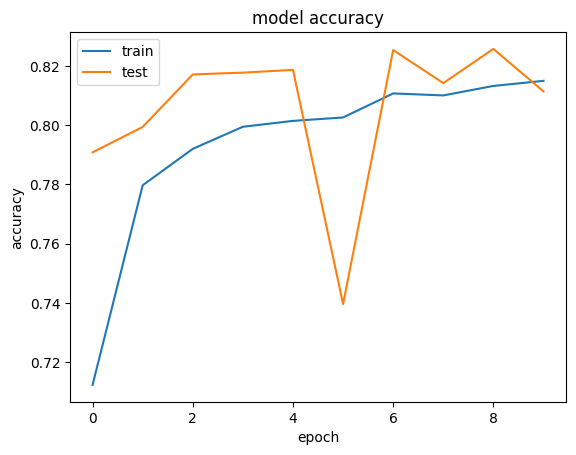

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()